In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ===========================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ===========================================================================
import warnings
warnings.filterwarnings('ignore')
# Datos
# ===========================================================================

           X1        X2
0    2.526093  0.321050
1    0.366954  0.031462
2    0.768219  0.717486
3    0.693436  0.777194
4   -0.019837  0.867254
..        ...       ...
195  0.256750  2.293605
196  1.925173  0.165053
197  1.301941  0.992200
198  0.008131  2.242264
199 -0.196246  0.551404

[200 rows x 2 columns]


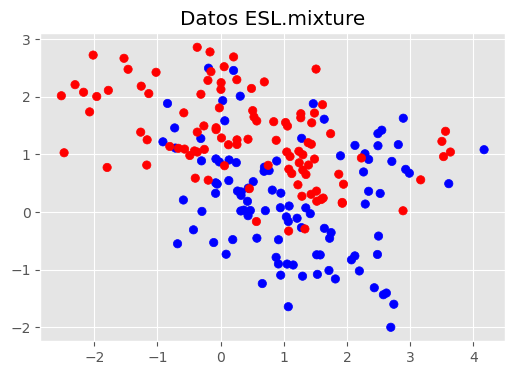

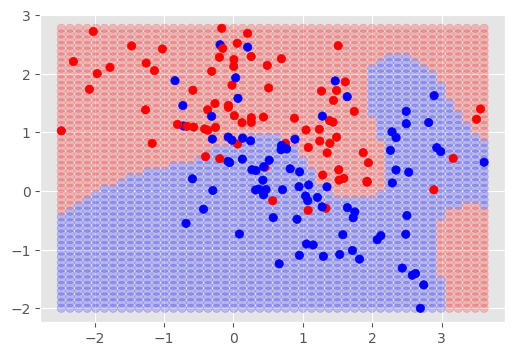

In [3]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
datos = pd.read_csv(url)
datos.head(3)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.X1, datos.X2, c=datos.y)
ax.set_title("Datos ESL.mixture")
X = datos.drop(columns = 'y')
print(X)
y = datos['y']
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),train_size = 0.8,random_state = 1234,shuffle = True)
modelo = SVC(C = 100, kernel = 'rbf', random_state=123)
modelo.fit(X_train, y_train)
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T
pred_grid = modelo.predict(grid)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)



In [11]:
ax.scatter(
modelo.support_vectors_[:, 0],
modelo.support_vectors_[:, 1],
s=200, linewidth=1,
facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
X,
Y,
modelo.decision_function(grid).reshape(X.shape),
colors = 'k',
levels = [-1, 0, 1],
alpha = 0.5,
linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");
predicciones = modelo.predict(X_test)
predicciones


array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [12]:
accuracy = accuracy_score(
y_true = y_test,
y_pred = predicciones,
 normalize = True
)
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 85.0%
